In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
match_data = pd.read_csv('..\\Data\\matchData2.csv')
wins = pd.read_csv('..\\Data\\matchDataWins.csv')

In [3]:
# cantidad de filas de cada conjunto de datos
print(f'Cantidad de filas en match_data: {match_data.shape[0]}')
print(f'Cantidad de filas en wins: {wins.shape[0]}')

Cantidad de filas en match_data: 110714
Cantidad de filas en wins: 110714


In [4]:
win_team1 = pd.DataFrame(wins['win_team1'])
win_team2 = pd.DataFrame(wins['win_team2'])

<Axes: xlabel='win_team1', ylabel='count'>

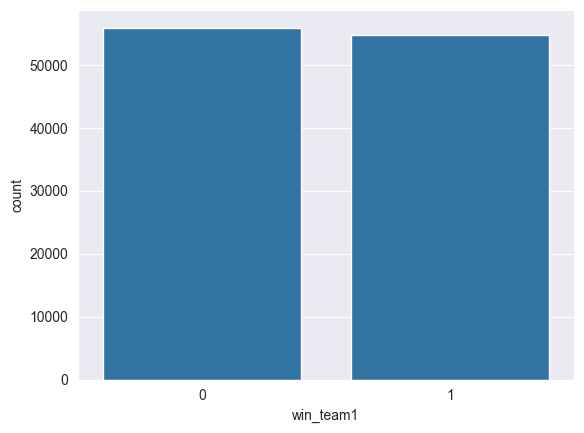

In [5]:
#Graficar la cantidad de victrorias con respecto a las derrotas de un equipo
sns.countplot(x='win_team1', data=wins)

In [6]:
# Elimina las columnas de firstBaron, win_team1 y win_team2
match_data = match_data.drop(['firstBaronTeam1', 'firstBaronTeam2', 'win_team1', 'win_team2'], axis=1)

In [7]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
predictors = match_data
predictors_train, predictors_test, wins_team1_train, wins_team1_test, wins_team2_train, wins_team2_test = train_test_split(predictors, win_team1, win_team2, test_size=0.2, random_state=42)

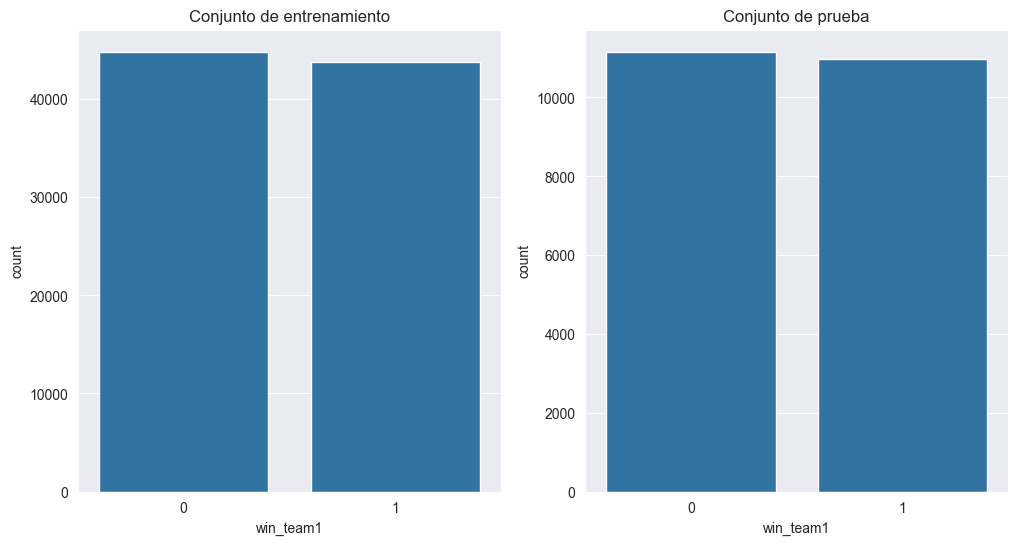

In [8]:
# graficar la cantidad de victorias y derrotas en el conjunto de entrenamiento y prueba
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='win_team1', data=wins_team1_train, ax=ax[0])
ax[0].set_title('Conjunto de entrenamiento')
sns.countplot(x='win_team1', data=wins_team1_test, ax=ax[1])
ax[1].set_title('Conjunto de prueba')
plt.show()

In [9]:
# Inicializa el clasificador
random_forest_model = RandomForestClassifier(
    n_estimators=171,
    bootstrap=True,
    max_depth=15,
    max_features= 11,
    min_samples_leaf= 8,
    min_samples_split= 8,
    random_state=42,
    n_jobs=-1,
    min_impurity_decrease=0.0001
)

# Entrena el modelo
random_forest_model.fit(predictors_train, wins_team1_train)

C:\Users\Facu\PycharmProjects\Proyecto_Final_IA\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=15, max_features=11,
                       min_impurity_decrease=0.0001, min_samples_leaf=8,
                       min_samples_split=8, n_estimators=171, n_jobs=-1,
                       random_state=42)

In [10]:
wins_pred_test = random_forest_model.predict(predictors_test)
wins_pred_train = random_forest_model.predict(predictors_train)


# Evalúa el rendimiento del modelo
accuracy = accuracy_score(wins_team1_test, wins_pred_test)
print(f'Accuracy in test data: {accuracy}')
accuracy = accuracy_score(wins_team1_train, wins_pred_train)
print(f'Accuracy in train data: {accuracy}')

Accuracy in test data: 0.7540531996567764
Accuracy in train data: 0.7632294994975782


Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win            8477            2685
Actual Lose           2761            8220


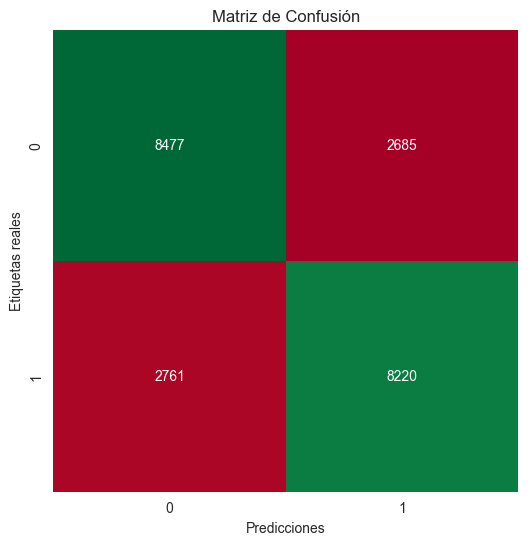

In [11]:
# Crear la matriz de confusión para datos de prueba del team1
conf_matrix = confusion_matrix(wins_team1_test, wins_pred_test)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdYlGn", cbar=False,
            xticklabels=np.unique(wins_pred_test),
            yticklabels=np.unique(wins_team1_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win           34481           10341
Actual Lose          10630           33119


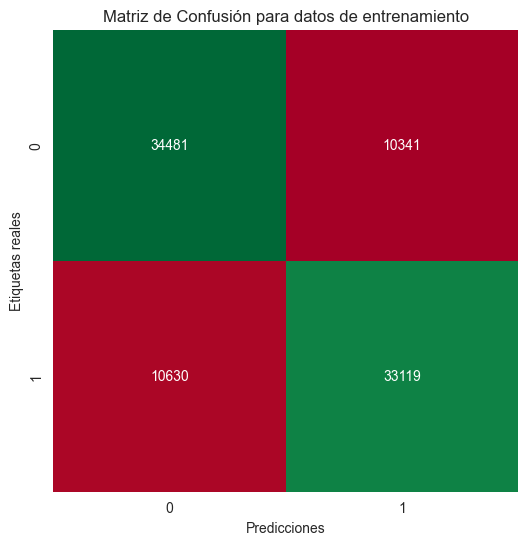

In [17]:
# Crear matriz de confusión para datos de entrenamiento del team1
conf_matrix = confusion_matrix(wins_team1_train, wins_pred_train)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdYlGn", cbar=False,
            xticklabels=np.unique(wins_pred_train),
            yticklabels=np.unique(wins_team1_train))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión para datos de entrenamiento')
plt.show()

In [13]:
# Calcular la precisión para team1: 
precision = precision_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la sensibilidad (recall) para team1: 
recall = recall_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la puntuación F1 para team1: 
f1 = f1_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la exactitud para team1: 
accuracy = accuracy_score(wins_team1_test, wins_pred_test)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.7541
Sensibilidad (Recall): 0.7541
Puntuación F1: 0.7540
Exactitud: 0.7541


In [14]:
# Calcular métricas para datos de entrenamiento
precision = precision_score(wins_team1_train, wins_pred_train, average='weighted')
recall = recall_score(wins_team1_train, wins_pred_train, average='weighted')
f1 = f1_score(wins_team1_train, wins_pred_train, average='weighted')
accuracy = accuracy_score(wins_team1_train, wins_pred_train)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.7632
Sensibilidad (Recall): 0.7632
Puntuación F1: 0.7632
Exactitud: 0.7632


In [15]:
# Ver la importancia de cada columna
feature_importances = random_forest_model.feature_importances_
print('Importancia de las características:')
sorted(feature_importances, reverse=True)
for i, importance in enumerate(feature_importances):
     print(f'{random_forest_model.feature_names_in_[i]}: {importance}')

Importancia de las características:
gameDuration: 0.13810196500029304
firstBloodTeam1: 0.003559262425317149
firstTowerTeam1: 0.2701391906219194
firstDragonTeam1: 0.05279642268847027
firstRiftHeraldTeam1: 0.011480644745019135
ban1Team1: 0.0004099091319920689
ban2Team1: 0.0004679603456221053
ban3Team1: 0.00035489065386388406
ban4Team1: 0.000317579965823394
ban5Team1: 0.00038338417422440553
champ1Team1: 0.0005290485605538492
champ2Team1: 0.0006138305305598368
champ3Team1: 0.0005800780270112265
champ4Team1: 0.0005042199009155359
champ5Team1: 0.0004168116705144012
firstBloodTeam2: 0.004525672202569039
firstTowerTeam2: 0.23346928400037253
firstDragonTeam2: 0.04207362889245216
firstRiftHeraldTeam2: 0.02143026375878126
ban1Team2: 0.0004255011360065967
ban2Team2: 0.00037367842980778854
ban3Team2: 0.00038945887752986157
ban4Team2: 0.0005223032003722042
ban5Team2: 0.0004813922938509733
champ1Team2: 0.0005949331459898317
champ2Team2: 0.0005095441252005258
champ3Team2: 0.00046893142508094664
champ4

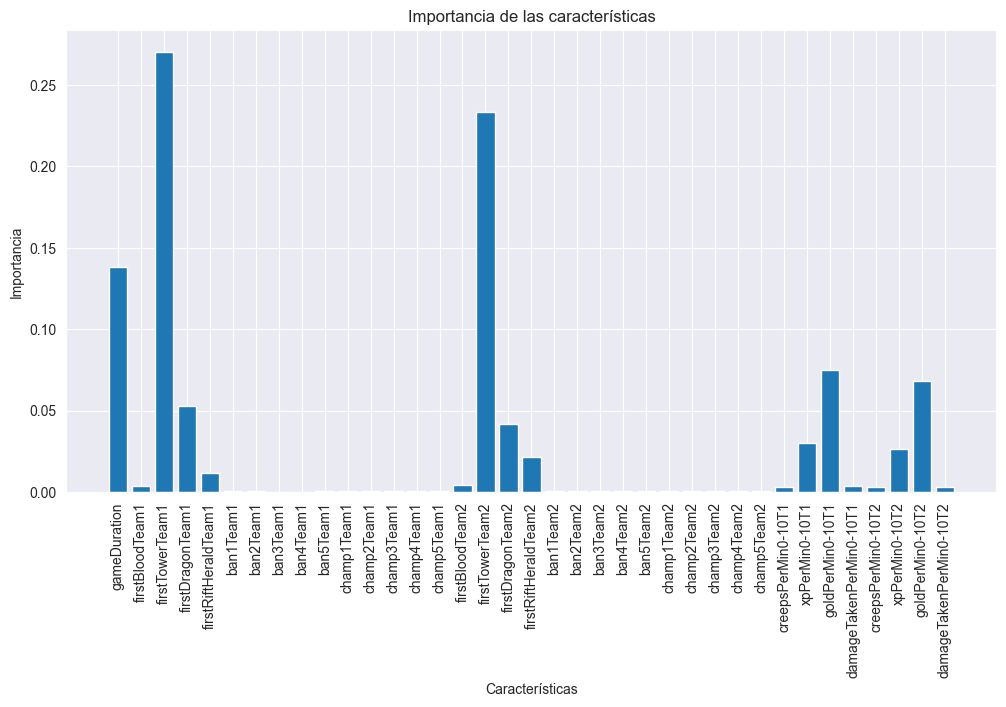

In [16]:
# Creamos un grafico de barras que muestre la importancia de cada caracteristica
plt.figure(figsize=(12, 6))
plt.bar(random_forest_model.feature_names_in_, feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()